In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [18]:
train = pd.read_csv('/Users/wilbertpeniche/Desktop/credit risk /ultimateDf.csv')
test = pd.read_csv('/Users/wilbertpeniche/Desktop/credit risk /ultimateDf1.csv')

In [3]:
test.drop(['SK_ID_PREV','SK_ID_CURR'],axis=1,inplace=True)
train.drop(['SK_ID_PREV','SK_ID_CURR'],axis=1,inplace=True)

In [5]:
import pandas as pd
from sklearn.utils import resample

# Dividir los datos en clases mayoritarias y minoritarias
df_majority = train[train['TARGET'] == 0]
df_minority = train[train['TARGET'] == 1]

# Aplicar el submuestreo aleatorio en la clase mayoritaria
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combinar las clases mayoritarias submuestreadas y las minoritarias
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Mezclar el DataFrame resultante
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
"""
import pandas as pd
from sklearn.utils import resample


# Dividir los datos en clases mayoritarias y minoritarias
df_majority = df[df['TARGET'] == 0]
df_minority = df[df['TARGET'] == 1]

# Aplicar el sobremuestreo aleatorio en la clase minoritaria
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combinar las clases mayoritarias y minoritarias sobremuestreadas
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Mezclar el DataFrame resultante
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
"""

"\nimport pandas as pd\nfrom sklearn.utils import resample\n\n\n# Dividir los datos en clases mayoritarias y minoritarias\ndf_majority = df[df['TARGET'] == 0]\ndf_minority = df[df['TARGET'] == 1]\n\n# Aplicar el sobremuestreo aleatorio en la clase minoritaria\ndf_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)\n\n# Combinar las clases mayoritarias y minoritarias sobremuestreadas\ndf_balanced = pd.concat([df_majority, df_minority_upsampled])\n\n# Mezclar el DataFrame resultante\ndf_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)\n"

In [36]:
df_balanced

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS mobile with interest,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT,AMT_PAYMENT
0,0,1,1,0,292500.0,1125000.0,36423.0,-14843,-236,-668.0,...,1.0,0.0,0.0,0.0,1.0,1.0,11.0,-7.0,25128.000,25128.000
1,0,1,0,0,135000.0,1436850.0,42142.5,-11211,-454,-2836.0,...,0.0,0.0,0.0,0.0,0.0,1.0,23.0,-12.0,12430.485,12430.485
2,0,1,1,1,337500.0,536917.5,30109.5,-14355,-4021,-8388.0,...,0.0,0.0,1.0,0.0,0.0,1.0,12.0,-228.0,20511.765,20511.765
3,1,1,0,1,112500.0,237024.0,15840.0,-17779,-188,-9181.0,...,0.0,0.0,1.0,0.0,0.0,1.0,6.0,-670.0,5156.865,5156.865
4,1,1,1,1,76500.0,254700.0,14220.0,-24276,365243,-13589.0,...,0.0,0.0,0.0,0.0,1.0,1.0,5.0,-593.0,6776.595,6776.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,0,1,0,0,112500.0,359725.5,23548.5,-20406,-1740,-5336.0,...,0.0,1.0,1.0,1.0,0.0,1.0,23.0,-26.0,26341.380,26341.380
565368,0,1,1,0,130500.0,405000.0,27396.0,-11946,-553,-5257.0,...,0.0,1.0,0.0,1.0,0.0,1.0,21.0,-29.0,14316.120,14316.120
565369,1,1,1,1,117000.0,354469.5,18688.5,-20975,365243,-2233.0,...,1.0,1.0,0.0,1.0,0.0,1.0,11.0,-10.0,10411.605,10411.605
565370,0,1,1,1,225000.0,533668.5,22738.5,-14751,-1801,-7000.0,...,0.0,0.0,0.0,1.0,1.0,1.0,10.0,-16.0,12476.385,12476.385


<AxesSubplot: >

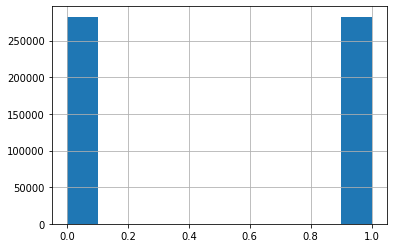

In [37]:
df_balanced["TARGET"].hist()

In [35]:
y

0         0
1         0
2         0
3         1
4         1
         ..
565367    0
565368    0
565369    1
565370    0
565371    0
Name: TARGET, Length: 565372, dtype: int64

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



X = df_balanced.drop('TARGET', axis=1)
y = df_balanced['TARGET']

X_train = X
y_train = y
X_test = test
# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear un clasificador RandomForest con pesos de clase ajustados
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenar el modelo
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular métricas de rendimiento
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [8]:
mask = clf.feature_importances_>1e-2
selected_features = X.columns[mask]

new_X = X[selected_features]
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49650 entries, 0 to 49649
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AMT_INCOME_TOTAL         49650 non-null  float64
 1   AMT_CREDIT_x             49650 non-null  float64
 2   AMT_ANNUITY_x            49650 non-null  float64
 3   DAYS_BIRTH               49650 non-null  int64  
 4   DAYS_EMPLOYED            49650 non-null  int64  
 5   DAYS_REGISTRATION        49650 non-null  float64
 6   DAYS_ID_PUBLISH          49650 non-null  int64  
 7   CNT_FAM_MEMBERS          49650 non-null  float64
 8   DAYS_CREDIT              49650 non-null  float64
 9   DAYS_CREDIT_ENDDATE      49650 non-null  float64
 10  AMT_CREDIT_SUM           49650 non-null  float64
 11  DAYS_CREDIT_UPDATE       49650 non-null  float64
 12  MONTHS_BALANCE_x         49650 non-null  float64
 13  SK_ID_PREV_x             49650 non-null  float64
 14  SK_ID_PREV_y          

In [9]:

# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear un clasificador RandomForest con pesos de clase ajustados
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenar el modelo
clf.fit(new_X, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
final_model = GradientBoostingClassifier(n_estimators=200,)
final_model.fit(X_train, y_train)
predicted = final_model.predict(X_test)


In [32]:
y_pred = predicted 

In [10]:

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test[selected_features])

# Calcular métricas de rendimiento
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [11]:
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [33]:
df =pd.DataFrame(y_pred)

In [34]:
df.value_counts()

0    30514
1    18230
dtype: int64

In [22]:
df 

,0
0,1
1,0
2,0
3,0
4,1
...,...
48739,0
48740,1
48741,0
48742,1


In [14]:
#now we are exporting it to csv 
df.to_csv('prediction.csv',index= False)
df.to_csv('/Users/wilbertpeniche/Desktop/credit risk /prediction.csv',index= False)

In [35]:
df1 = test["SK_ID_CURR"]

In [36]:
df1

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

In [21]:
df2 = pd.concat(df1,df)

/var/folders/v2/pq1tvmjx777fhcpd1y0mzr_80000gn/T/ipykernel_18213/2027840436.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df2 = pd.concat(df1,df)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [67]:
df1

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

In [68]:
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
48739,0
48740,0
48741,0
48742,0


In [37]:
concatenado = pd.concat([df1, df],axis= 1)

In [38]:
concatenado

,SK_ID_CURR,0
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,1
48741,456223,0
48742,456224,0


In [39]:
concatenado.columns = ['SK_ID_CURR', 'TARGET']

In [40]:
concatenado

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,1
48741,456223,0
48742,456224,0


In [41]:
concatenado.to_csv('predd.csv', index=False)
concatenado.to_csv('/Users/wilbertpeniche/Desktop/credit risk /predd.csv',index= False)
